<a href="https://colab.research.google.com/github/Derive-ip/Excess-death/blob/master/KFAS_tokyo_death_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("KFAS")
library(KFAS)
#library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
tokyo.csv <- read.csv('https://raw.githubusercontent.com/Derive-ip/Excess-death/master/tokyo-pref.csv?token=AQDAL4YF7UZ57NVNNN45LC2664TQI')
#tokyo.csv <- read.csv('https://www.derive-ip.com/wp-content/uploads/tokyo-pref.csv')
tokyo.death.rate.2017 <- ts(tokyo.csv[1:48,5], start=2013, frequency = 12)
tokyo.death.rate.2018 <- ts(tokyo.csv[1:60,5], start=2013, frequency = 12)
tokyo.death.rate.2019 <- ts(tokyo.csv[1:72,5], start=2013, frequency = 12)
tokyo.death.rate.all <- ts(tokyo.csv[1:88,5], start=2013, frequency = 12)
tokyo.pref.2017 <- ts(tokyo.csv[1:48,2], start=2013, frequency = 12)
tokyo.pref.2018 <- ts(tokyo.csv[1:60,2], start=2013, frequency = 12)
tokyo.pref.2019 <- ts(tokyo.csv[1:72,2], start=2013, frequency = 12)
tokyo.pref.all <- ts(tokyo.csv[1:88,2], start=2013, frequency = 12)
tokyo.mhlw.2017 <- ts(tokyo.csv[1:48,3], start=2013, frequency = 12)
tokyo.mhlw.2018 <- ts(tokyo.csv[1:60,3], start=2013, frequency = 12)
tokyo.mhlw.2019 <- ts(tokyo.csv[1:72,3], start=2013, frequency = 12)
tokyo.mhlw.all <- ts(tokyo.csv[1:88,3], start=2013, frequency = 12)
tokyo.death.rate.before <- ts(tokyo.csv[1:86,5], start=2013, frequency = 12)

In [4]:
obs.data <- tokyo.death.rate.all

In [5]:
obs.data[87:88] <- NA
tail(obs.data)

[1] 8.800374 9.226821 9.972108 9.011304       NA       NA

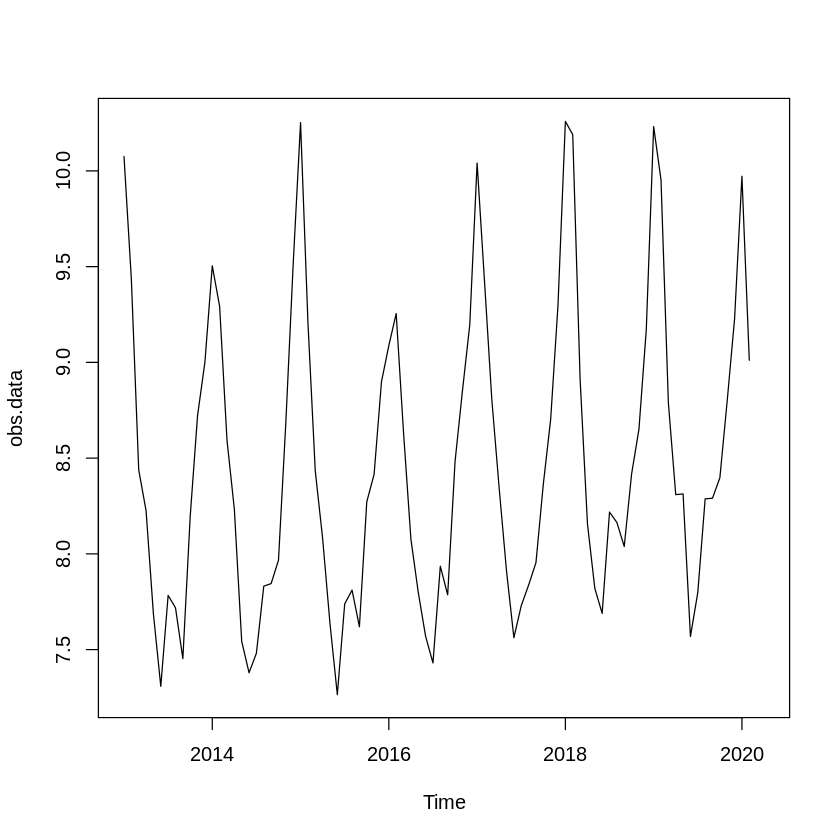

In [6]:
plot(obs.data)

In [7]:
# Step1：モデルの構造を決める
build_kfas <- SSModel(
  obs.data ~  SSMtrend(degree = 2, Q = list(NA, NA)) 
           +  SSMseasonal(period = 12, sea.type = "dummy", Q = matrix(NA)),
              H = matrix(NA) )
# Step2：パラメタ推定
fit_kfas <- fitSSM(model = build_kfas, inits = c(1, 1, 1, 1) )

# Step3、4：フィルタリング・スムージング
result_kfas <- KFS(
  fit_kfas$model, 
  filtering = c("state", "mean"),
  smoothing = c("state", "mean") )

In [8]:
# フィルタ化推定量
filter_kfas <- result_kfas$att[,1]+result_kfas$att[,3]
# 平滑化推状態
smooth_kfas <- result_kfas$alphahat[,1]+result_kfas$alphahat[,3]
# 信頼区間付の平滑化
smooth_conf <- predict(fit_kfas$model, interval = "confidence", level = 0.95)

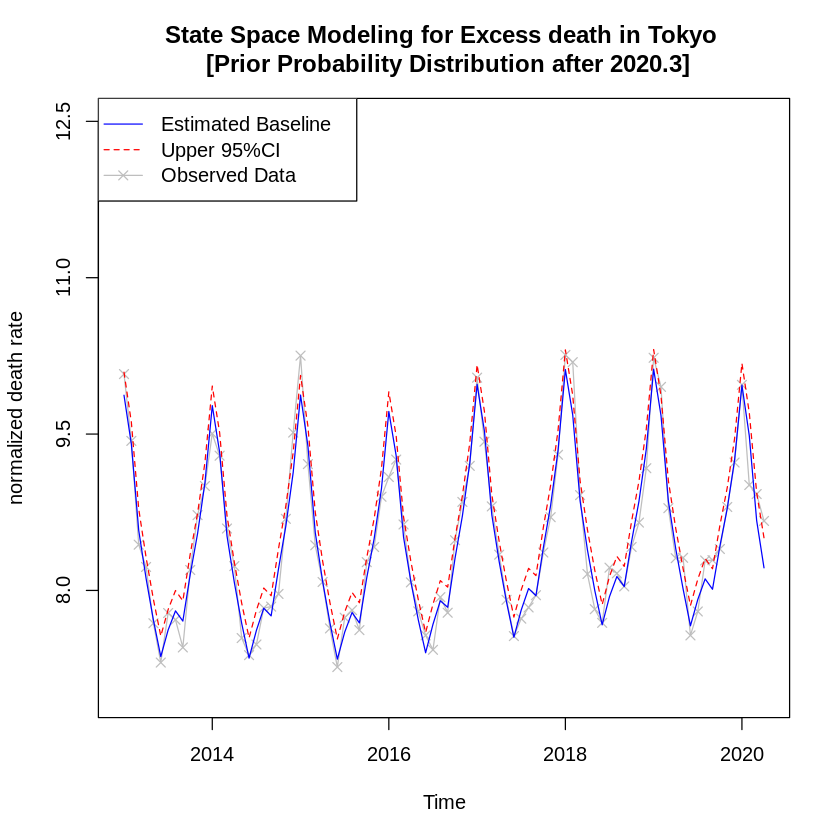

In [10]:
plot(tokyo.death.rate.all, type = "o", col = 8, pch = 4,
     ylim = c(7, 12.5), yaxp = c(8, 12.5, 3),
     ylab = "normalized death rate", main = "State Space Modeling for Excess death in Tokyo \n [Prior Probability Distribution after 2020.3]")
lines(smooth_conf[,1], col = 4)
#lines(smooth_conf[,2], col = 4)
lines(smooth_conf[,3], lty = 2, col = 2)
legend("topleft", 
   legend = c("Estimated Baseline", "Upper 95%CI", "Observed Data"),
   lty = c(1, 2, 1),
   col = c(4,2,8),
   pch = c(NA,NA,4)
)

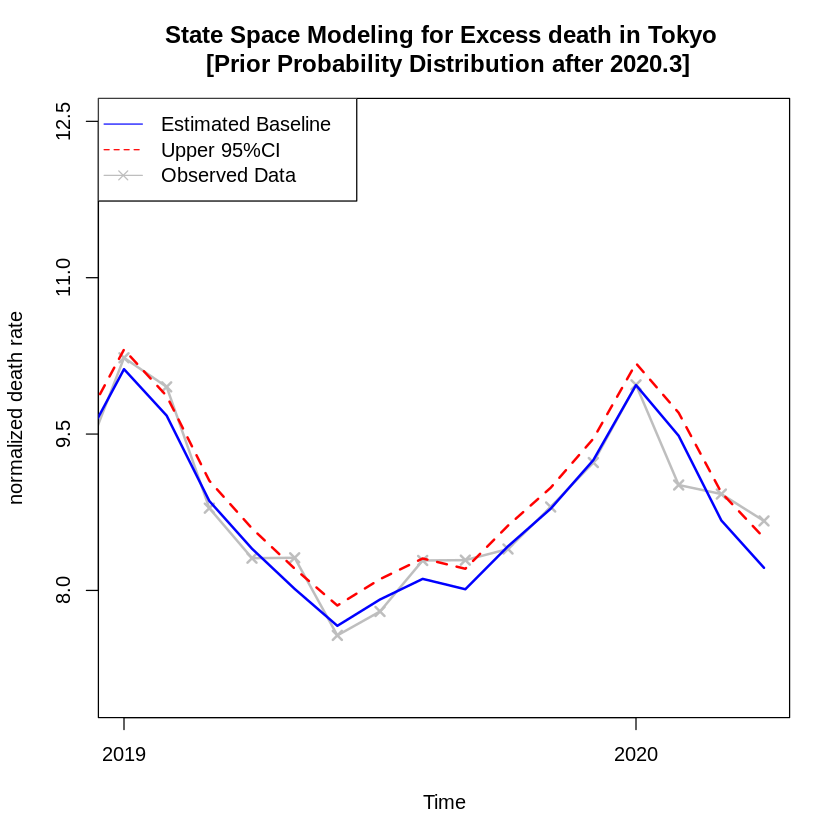

In [11]:
plot(tokyo.death.rate.all, pch=4, col=8, type="o", lwd=2,
     xlim = c(2019, 2020+3/12), xaxp = c(2019, 2020, 1),
     ylim = c(7, 12.5), yaxp = c(8, 12.5, 3),
     ylab = "normalized death rate", main = "State Space Modeling for Excess death in Tokyo \n [Prior Probability Distribution after 2020.3]")
lines(smooth_conf[,1], col=4, lwd=2)
#lines(smooth_conf[,2], col = 4, lwd=2)
lines(smooth_conf[,3], lty=2, col=2, lwd=2)
legend("topleft", 
   legend = c("Estimated Baseline", "Upper 95%CI", "Observed Data"),
   lty = c(1, 2, 1),
   col = c(4,2,8),
   pch = c(NA,NA,4)
)

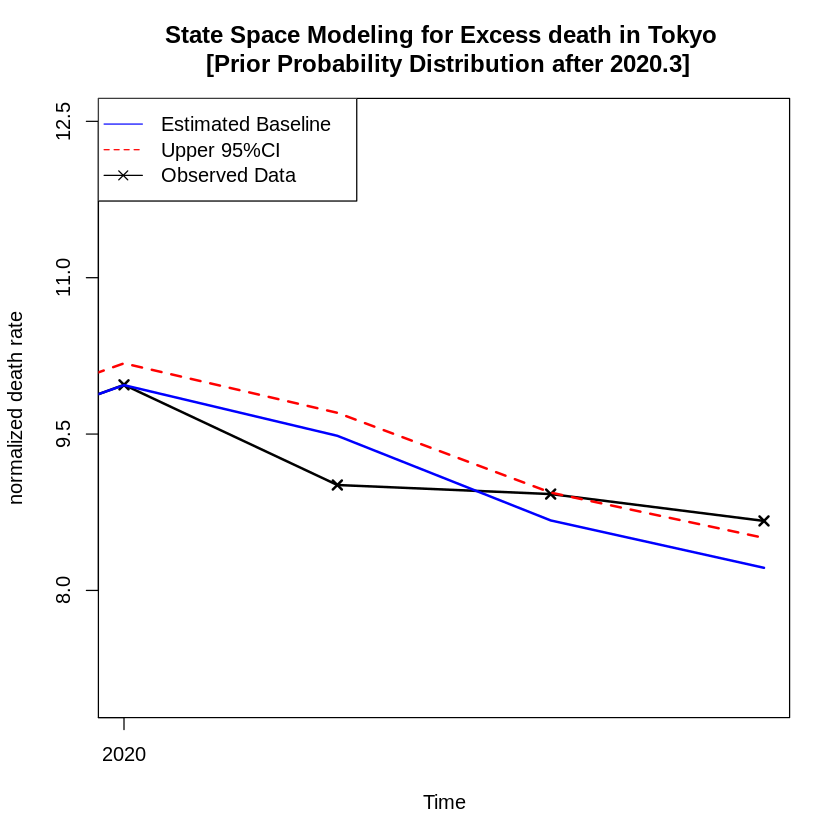

In [12]:
plot(tokyo.death.rate.all, pch=4, col=1, type="o", lwd=2,
     xlim = c(2020, 2020+3/12), xaxp = c(2019, 2020, 1),
     ylim = c(7, 12.5), yaxp = c(8, 12.5, 3),
     ylab = "normalized death rate", main = "State Space Modeling for Excess death in Tokyo \n [Prior Probability Distribution after 2020.3]")
lines(smooth_conf[,3], lty=2, col=2, lwd=2)
lines(smooth_conf[,1], col=4, lwd=2)
legend("topleft", 
   legend = c("Estimated Baseline", "Upper 95%CI", "Observed Data"),
   lty = c(1, 2, 1),
   col = c(4,2,1),
   pch = c(NA,NA,4)
)